<a href="https://colab.research.google.com/github/nehalbaid10/program1/blob/master/MLproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import sys
print('Python: {}'.format(sys.version))
import scipy
print('SciPy: {}'.format(scipy.__version__))
import numpy
print('Numpy: {}'.format(numpy.__version__))
import matplotlib
print('Matplotlib: {}'.format(matplotlib.__version__))
import pandas
print('Pandas: {}'.format(pandas.__version__))
import sklearn
print('Sklearn: {}'.format(sklearn.__version__))

Python: 3.6.9 (default, Apr 18 2020, 01:56:04) 
[GCC 8.4.0]
SciPy: 1.4.1
Numpy: 1.18.5
Matplotlib: 3.2.2
Pandas: 1.0.5
Sklearn: 0.22.2.post1


In [12]:
import pandas
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.ensemble import VotingClassifier

In [15]:
#loading data
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'class']
dataset = read_csv(url,names=names)

In [17]:
#dimenions of datasets
print(dataset.shape)
#peek at data
print(dataset.head(20))

(150, 4)
     sepal-length  sepal-width  petal-length        class
5.1           3.5          1.4           0.2  Iris-setosa
4.9           3.0          1.4           0.2  Iris-setosa
4.7           3.2          1.3           0.2  Iris-setosa
4.6           3.1          1.5           0.2  Iris-setosa
5.0           3.6          1.4           0.2  Iris-setosa
5.4           3.9          1.7           0.4  Iris-setosa
4.6           3.4          1.4           0.3  Iris-setosa
5.0           3.4          1.5           0.2  Iris-setosa
4.4           2.9          1.4           0.2  Iris-setosa
4.9           3.1          1.5           0.1  Iris-setosa
5.4           3.7          1.5           0.2  Iris-setosa
4.8           3.4          1.6           0.2  Iris-setosa
4.8           3.0          1.4           0.1  Iris-setosa
4.3           3.0          1.1           0.1  Iris-setosa
5.8           4.0          1.2           0.2  Iris-setosa
5.7           4.4          1.5           0.4  Iris-setosa
5.4  

In [18]:
#statistical summary
print(dataset.describe)

<bound method NDFrame.describe of      sepal-length  sepal-width  petal-length           class
5.1           3.5          1.4           0.2     Iris-setosa
4.9           3.0          1.4           0.2     Iris-setosa
4.7           3.2          1.3           0.2     Iris-setosa
4.6           3.1          1.5           0.2     Iris-setosa
5.0           3.6          1.4           0.2     Iris-setosa
..            ...          ...           ...             ...
6.7           3.0          5.2           2.3  Iris-virginica
6.3           2.5          5.0           1.9  Iris-virginica
6.5           3.0          5.2           2.0  Iris-virginica
6.2           3.4          5.4           2.3  Iris-virginica
5.9           3.0          5.1           1.8  Iris-virginica

[150 rows x 4 columns]>


In [19]:
#class distribution
print(dataset.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


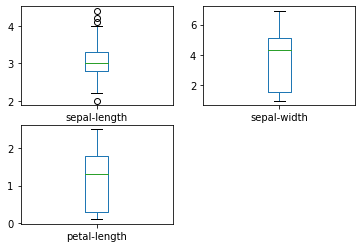

In [20]:
#univariate plot - box and whisker plot
dataset.plot(kind='box',subplots=True, layout=(2,2),sharex=False,sharey=False)
pyplot.show()

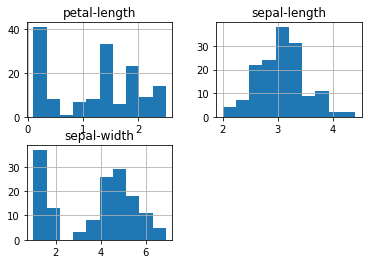

In [21]:
#histogram of variable
dataset.hist()
pyplot.show()

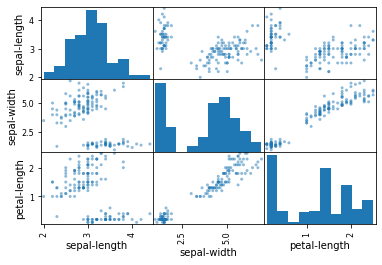

In [22]:
#multivariate plots
scatter_matrix(dataset)
pyplot.show()

In [26]:
#creating a validation data set
#splitting dataset
array = dataset.values
X = array[:,0:3]
Y = array[:,3]
X_train, X_validation, Y_train, Y_validation = train_test_split(X,Y, test_size=0.2,random_state=1)

In [33]:
#logistic regression
#linear Discriminant Analysis
#K nearest neighbours
#classification and regression trees
#gaussian naive bayes
#support vector machines
models =[]
models.append(('LR', LogisticRegression(solver='liblinear',multi_class='ovr')))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVN', SVC(gamma='auto')))

NameError: ignored

In [34]:
#evaluate the created model
results = []
names = []
for name,model in models:
  kfold  = StratifiedKFold(n_splits=10, random_state=1)
  cv_results = cross_val_score(model, X_train, Y_train, cv = kfold, scoring='accuracy')
  results.append(cv_results)
  names.append(name)
  print('%s: %f (%f)' % (name, cv_results.mean(),cv_results.std()))

LR: 0.916667 (0.064550)
LDA: 0.966667 (0.055277)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


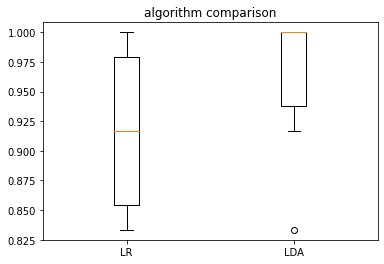

In [35]:
#compare our models
pyplot.boxplot(results, labels = names)
pyplot.title('algorithm comparison')
pyplot.show()


In [37]:
#make predictions
model = SVC(gamma='auto')
model.fit(X_train,Y_train)
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation,predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation,predictions))

0.9666666666666667
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30

